# Multiple sinusoidal amplitude, frequency and phase estimation

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from pyestimate import multiple_sin_param_estimate

import numpy as np
import matplotlib.pyplot as plt

Generate a sum of noisy sinusoids for which we want to estimate amplitudes, frequencies and phases

In [2]:
N = 50 # number of samples
f = [0.13456, 0.11234] # frequencies to be estimated
A = [1.23456, 1.34567] # amplitude to be estimated
phi = [0, np.pi/4] # phase to be estimated
p = len(A) # number of sinusoids
sigma = 0.5 # standard deviation of WGN
n = np.arange(N)
s = 0.0
for i in range(p):
    s += A[i] * np.cos(2*np.pi*f[i]*n+phi[i]) # original signal
w = np.random.default_rng(seed=0).normal(scale=sigma, size=N) # white gaussian noise
x = s+w # input signal for estimation: sine + noise

Estimate sinusoid parameters

In [3]:
A_hat, f_hat, phi_hat = multiple_sin_param_estimate(x, p, brute_Ns=100) # parameters estimation

Reconstruct original signal from estimated parameters

In [4]:
s_hat = 0.0
for i in range(p):
    s_hat += A_hat[i] * np.cos(2*np.pi*f_hat[i]*n+phi_hat[i]) # estimated signal

Plot the original signal, the input signal corrupted with noise and the reconstructed signal

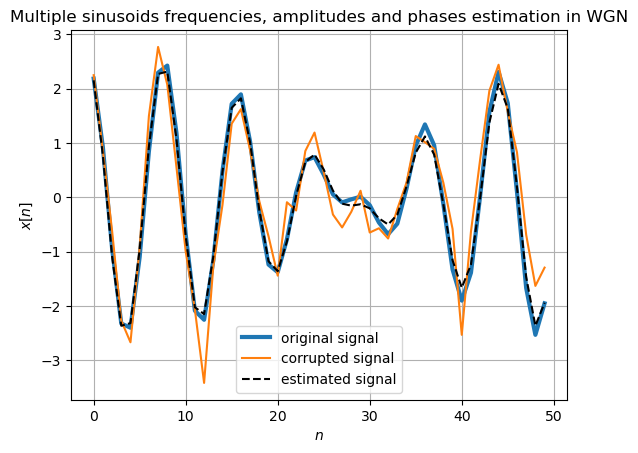

In [5]:
plt.plot(n, s, linewidth=3.0, label='original signal')
plt.plot(n, x, label='corrupted signal')
plt.plot(n, s_hat, 'k--', label='estimated signal')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.title('Multiple sinusoids frequencies, amplitudes and phases estimation in WGN')
plt.legend()
plt.grid()
plt.show()